In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from perceptron import Perceptron

In [5]:
root_path_A = '/Users/Alberto/Documents/Università/Leiden/DLNN/assignment 1'

#Import the test and training data
test_in = np.loadtxt(root_path_A + '/data/test_in.csv', delimiter=',')
test_out = np.loadtxt(root_path_A + '/data/test_out.csv', delimiter=',', dtype=int)
train_in = np.loadtxt(root_path_A + '/data/train_in.csv', delimiter=',')
train_out = np.loadtxt(root_path_A + '/data/train_out.csv', delimiter=',', dtype=int)

number_train = [len(train_out[np.where(train_out == i)]) for i in range(10)]

# Task 3

Geron rule


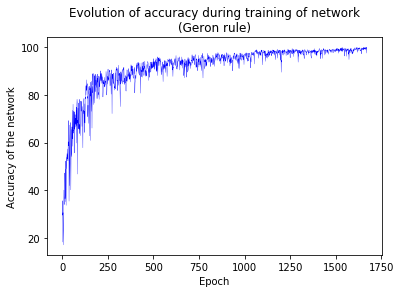

Epochs before 100% accuracy: 1671.0

Time elapsed before 100% accuracy: 35.118261098861694s

Overfitted weights: 545

Accuracy of the network with the test set: 88.7%

Lecture rule


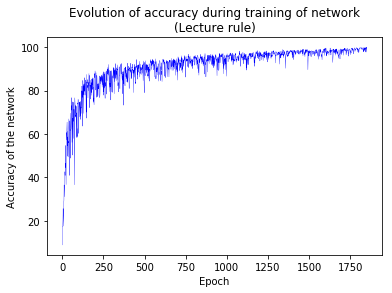

Epochs before 100% accuracy: 1850.0

Time elapsed before 100% accuracy: 40.727951526641846s

Overfitted weights: 2293

Accuracy of the network with the test set: 87.7%



In [3]:
np.random.seed(45)

#initializes the network with the training set pictures
perc = Perceptron(train_in, verbose=False)

#for cycle over the two different weight update rules
for rule_update, title, sfig in list(zip([True, False], ['Geron rule', 'Lecture rule'], ['geron', 'slide36'])):
    
    print(title)
    
    #set the gerson parameter of the class
    perc.geron = rule_update
    
    #trains the network with the training set labels
    train_acc, train_epoch, train_time = perc.train(train_out)

    #plots the evolution of accuracy during training
    plt.figure()
    plt.title("Evolution of accuracy during training of network\n({})".format(title))
    plt.plot(np.arange(len(train_acc)), train_acc, linewidth=.3, color='blue')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy of the network")
    plt.savefig("train-accuracy-{}.png".format(sfig))
    plt.show()

    #displays the epochs
    print('Epochs before 100% accuracy: {}\n'.format(train_epoch))
    
    #displays the runtime
    print('Time elapsed before 100% accuracy: {}s\n'.format(train_time))
    
    #finds the overfitted weights
    print("Overfitted weights: {}\n".format(len(np.where(np.ravel(perc.weights) > 10.)[0])))

    #updates the test set pictures into the network, keeping the trained weights
    perc.update_data(test_in)

    #computes the accuracy for the test set
    test_acc = perc.accuracy(test_out)
    print('Accuracy of the network with the test set: {}%\n'.format(test_acc))
    
    #reupdates the train set into the network, resetting the weights
    perc.update_data(train_in, reset_weights=True)

In [ ]:
#initializes the network with the training set pictures
perc = Perceptron(train_in, verbose=False)

#100 seeds
seeds = np.arange(100)

#list with the results, 9 columns: seed, geron train epochs, geron runtime, geron test accuracy,
#geron overfitted weights, slide 36 train epochs, slide 36 runtime, 
#slide 36 test accuracy, slide 36 overfitted weights
comp_list = []

for s in seeds:
    
    #sets the random seed
    np.random.seed(s)
    _temp = [s]
    
    #reset weights with the current seed
    perc.update_data(train_in, reset_weights=True)
    
    #for cycle over the two different weight update rules
    for rule_update, title, sfig in list(zip([True, False], ['Geron rule', 'Slide 36 rule'], ['geron', 'slide36'])):

        #set the geron parameter of the class
        perc.geron = rule_update

        #trains the network with the training set labels
        train_acc, train_epoch, train_runtime = perc.train(train_out)

        #number of overfitted weights
        over_weights = len(np.where(np.ravel(perc.weights) > 10.)[0])

        #updates the test set pictures into the network, keeping the trained weights
        perc.update_data(test_in)

        #computes the accuracy for the test set
        test_acc = perc.accuracy(test_out)
        
        _temp.append(train_epoch)
        _temp.append(train_runtime)
        _temp.append(test_acc)
        _temp.append(over_weights)

        #reupdates the train set into the network, resetting the weights
        perc.update_data(train_in, reset_weights=True)
        
    comp_list.append(_temp)
    print(s, _temp)
    
#saves the output file
the_file = open('task3comparison.txt', 'w+')
for iteration in comp_list:
    for col in iteration:
        the_file.write(str(col)+' ')
    the_file.write('\n')
the_file.close()

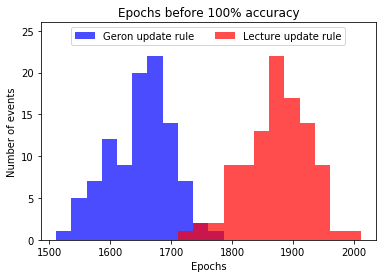

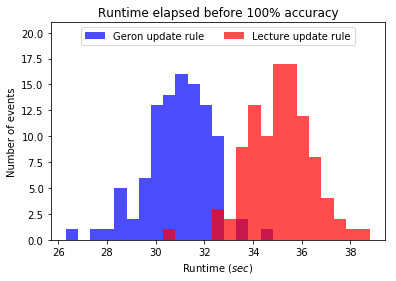

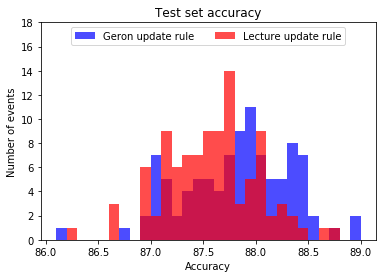

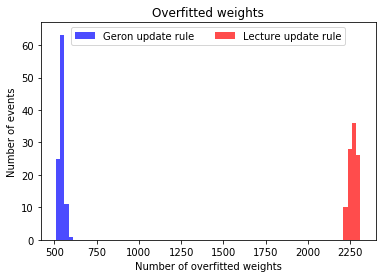

In [6]:
the_data = np.genfromtxt('task3comparison.txt')

#geron output
geron = [the_data[:,1], the_data[:, 2], the_data[:,3], the_data[:,4]]

#slide 36 output
slide36 = [the_data[:,5], the_data[:, 6], the_data[:,7], the_data[:,8]]

#plots the histograms
label_list = ['Epochs', 'Runtime ($sec$)', 'Accuracy', 'Number of overfitted weights']
title_list = ['Epochs before 100% accuracy', 'Runtime elapsed before 100% accuracy',
              'Test set accuracy', 'Overfitted weights']
bin_width = [25, 0.5, 0.1, 25]
save_list = ['epochs', 'runtime', 'test_accuracy', 'weights']

for data1, data2, label, title, width, sfig in list(zip(geron, slide36, label_list, title_list, bin_width, save_list)):
    
    #determines the bin array
    min_bin = min(min(data1), min(data2))
    max_bin = max(max(data1), max(data2))
    bins_array = np.arange(min_bin, max_bin+width, width)

    plt.figure()
    g_y, _x, _ = plt.hist(data1, bins=bins_array, label='Geron update rule', color='b', alpha=0.7)
    s36_y, _x, _ = plt.hist(data2, bins=bins_array, label='Lecture update rule', color='r', alpha=0.7)
    plt.legend(loc='upper center', ncol=2)
    plt.xlabel(label)
    plt.ylabel('Number of events')
    plt.ylim(0, max(max(g_y), max(s36_y))+4)
    plt.title(title)
    plt.savefig(sfig+'_comparison.png')
    plt.show()